# Udacity - Intro to Machine Learning

## Chapter 1 - Gaussian Naive Bayes Example 

Helper function to prepare terrain data

In [1]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

Helper function to visualize results

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
#matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()

Helper function to create the Gaussian Naive Bayes classifier

In [3]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB
    
    ### create classifier
    clf = GaussianNB()
    
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    
    ### return the fit classifier
    return(clf)
    
    ### your code goes here!

Create dataset, use the classifier and visualize the results

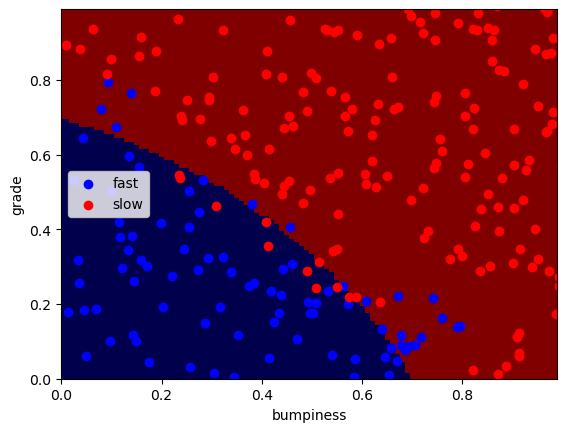

In [4]:
""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture, output_image
#from ClassifyNB import classify

import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)


Helper function to compute the accuracy of the Gaussian Naive Bayes Classifier

In [5]:
def NBAccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB

    ### create classifier
    clf = GaussianNB()

    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)

    ### use the trained classifier to predict labels for the test features
    pred = clf.predict(features_test)


    ### calculate and return the accuracy on the test data
    ### this is slightly different than the example, 
    ### where we just print the accuracy
    ### you might need to import an sklearn module
    accuracy = clf.score(features_test, labels_test)
    return accuracy

Calculate the accuracy

In [6]:
accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
print(f'The accuracy of the Gaussian Naive Bayes classifier was calculated as {100*accuracy}%.')

The accuracy of the Gaussian Naive Bayes classifier was calculated as 88.4%.


## Chapter 2 - Support Vector Machines (SVM)

## Chapter 2.1 - Linear SVM Classifier

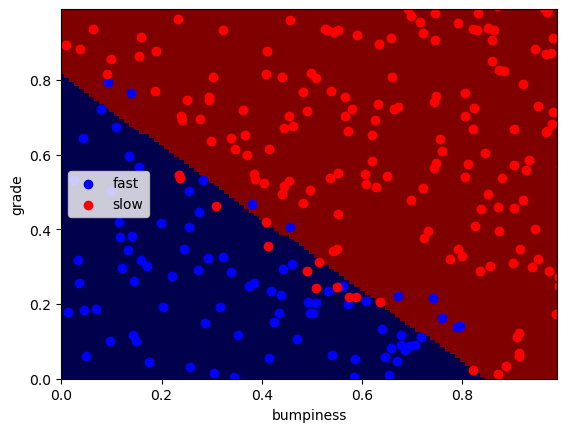

In [7]:
import sys
#from class_vis import prettyPicture
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(kernel="linear")


#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data

### fit the classifier on the training features and labels
clf.fit(features_train, labels_train)


#### store your predictions in a list named pred

# After being fitted, the model can then be used to predict new values
pred = clf.predict(features_test)

### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)


In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
print(f'The accuracy of the linear Support Vector Machine classifier was calculated as {100*accuracy}%.')

The accuracy of the linear Support Vector Machine classifier was calculated as 92.0%.


## Chapter 2.2 - Nonlinear SVM Classifier

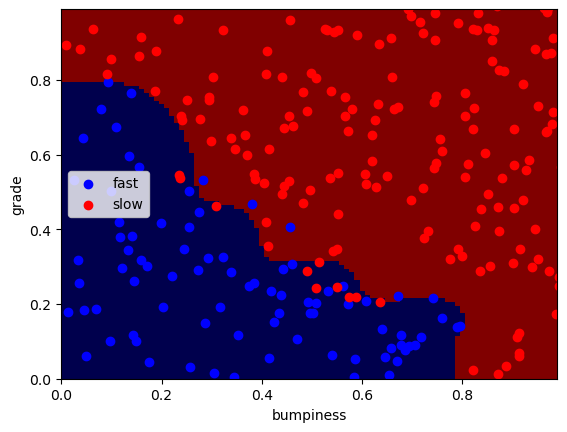

In [9]:
import sys
#from class_vis import prettyPicture
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(C=10, kernel="rbf", gamma=100)


#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data

### fit the classifier on the training features and labels
clf.fit(features_train, labels_train)


#### store your predictions in a list named pred

# After being fitted, the model can then be used to predict new values
pred = clf.predict(features_test)

### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
print(f'The accuracy of the nonlinear Support Vector Machine classifier was calculated as {round(100*accuracy, 2)}%.')

The accuracy of the nonlinear Support Vector Machine classifier was calculated as 94.4%.


## Chapter 3 - Decision Tree Classifier

Helper function to create the Gaussian Naive Bayes classifier

In [11]:
def classify(features_train, labels_train, min_samples_split=2):   
    ### import the sklearn module for Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    
    ### create classifier
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    
    ### return the fit classifier
    return(clf)
    
    ### your code goes here!

Create dataset, use the classifier and visualize the results

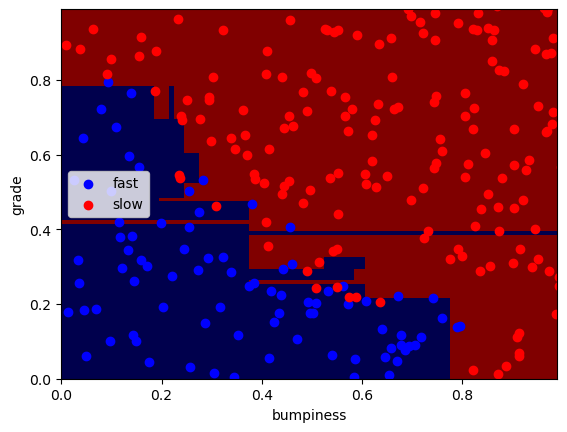

In [12]:
""" lecture and example code for decision tree unit """

import sys
# from class_vis import prettyPicture, output_image
# from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
# from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)

#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())

In [13]:
#from sklearn.metrics import accuracy_score
### use the trained model to predict new values
pred = clf.predict(features_test)
# calculate the accuracy
accuracy = accuracy_score(pred, labels_test)
print(f'The accuracy of the Decision Tree classifier was calculated as {round(100*accuracy, 2)}%.')

The accuracy of the Decision Tree classifier was calculated as 90.8%.


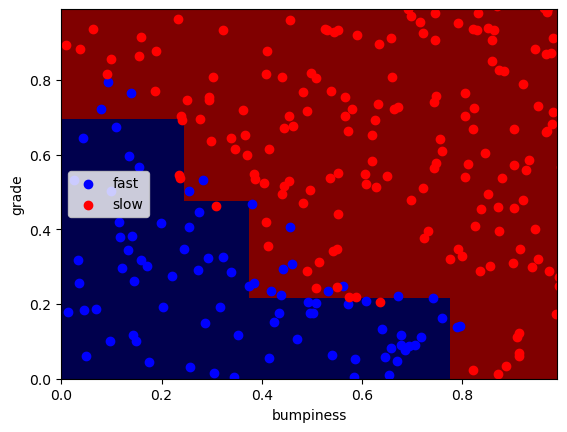

In [14]:
""" lecture and example code for decision tree unit """

import sys
# from class_vis import prettyPicture, output_image
# from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
# from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train, min_samples_split=50)

#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())

In [15]:
#from sklearn.metrics import accuracy_score
### use the trained model to predict new values
pred = clf.predict(features_test)
# calculate the accuracy
accuracy = accuracy_score(pred, labels_test)
print(f'The accuracy of the Decision Tree classifier was calculated as {round(100*accuracy, 2)}%.')

The accuracy of the Decision Tree classifier was calculated as 91.2%.


## Chapter 6 - Datasets and Questions

Explore the Enron dataset

The aggregated Enron email + financial dataset is stored in a dictionary, where each key in the dictionary is a person’s name and the value is a dictionary containing all the features of that person.
The email + finance (E+F) data dictionary is stored as a pickle file, which is a handy way to store and load python objects directly.

In [16]:
import joblib
with open("./ud120-projects/final_project/final_project_dataset.pkl", "rb") as o_file:
    enron_data = joblib.load(o_file)
print(type(enron_data))

<class 'dict'>


How many data points (people) are in the dataset?

In [17]:
len(enron_data)

146

For each person, how many features are available?

In [18]:
for key, val in enron_data.items( ):
    print('{k}: {v} features'.format(k=key, v=len(val)))
    break

print('Minimum number of features: ' + str(min(map(len, enron_data.values()))))
print('Maximum number of features: ' + str(max(map(len, enron_data.values()))))
print('List of features: ' + str(list(enron_data[list(enron_data.keys())[0]].keys())))

METTS MARK: 21 features
Minimum number of features: 21
Maximum number of features: 21
List of features: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']


The “poi” feature records whether the person is a person of interest, according to our definition. How many POIs are there in the E+F dataset?

In [19]:
sum(map(lambda d: d.get('poi'), enron_data.values()))

18

We compiled a list of all POI names (in ../final_project/poi_names.txt) and associated email addresses (in ../final_project/poi_email_addresses.py).

How many POI’s were there total? (Use the names file, not the email addresses, since many folks have more than one address and a few didn’t work for Enron, so we don’t have their emails.)

In [20]:
with open("./ud120-projects/final_project/poi_names.txt", "r") as o_file:
    poi_names = o_file.readlines()
len(poi_names[2:])

35

Like any dict of dicts, individual people/features can be accessed like so:

enron_data["LASTNAME FIRSTNAME"]["feature_name"]
or, sometimes
enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"]["feature_name"]

What is the total value of the stock belonging to James Prentice?

In [21]:
enron_data['PRENTICE JAMES']['total_stock_value']

1095040

How many email messages do we have from Wesley Colwell to persons of interest?

In [22]:
enron_data['COLWELL WESLEY']['from_this_person_to_poi']

11

What’s the value of stock options exercised by Jeffrey K Skilling?

In [23]:
for name in enron_data.keys():
    if 'SKILL' in name:
        break
soe = enron_data[name]['exercised_stock_options']
print(f'{name}: {soe:,} USD')

SKILLING JEFFREY K: 19,250,000 USD


Of these three individuals (Lay, Skilling and Fastow), who took home the most money (largest value of “total_payments” feature)?

How much money did that person get?

In [24]:
for name in enron_data.keys():
    for last_name in ('Lay', 'Skilling', 'Fastow'):
        if last_name.upper() in name:
            print('{name}: {money:,} USD'.format(name=name, money=enron_data[name]['total_payments']))

LAY KENNETH L: 103,559,793 USD
FASTOW ANDREW S: 2,424,083 USD
SKILLING JEFFREY K: 8,682,716 USD


For nearly every person in the dataset, not every feature has a value. How is it denoted when a feature doesn’t have a well-defined value?

In [25]:
enron_data['PRENTICE JAMES']['salary']

'NaN'

How many folks in this dataset have a quantified salary? What about a known email address?

In [26]:
cnt_salary = sum(map(lambda d: d.get('salary') != 'NaN', enron_data.values()))
print(f'Datasets with quantified salary: {cnt_salary}')
cnt_email = sum(map(lambda d: d.get('email_address') != 'NaN', enron_data.values()))
print(f'Datasets with known email address: {cnt_email}')

Datasets with quantified salary: 95
Datasets with known email address: 111


A python dictionary can’t be read directly into an sklearn classification or regression algorithm; instead, it needs a numpy array or a list of lists (each element of the list (itself a list) is a data point, and the elements of the smaller list are the features of that point).

We’ve written some helper functions (featureFormat() and targetFeatureSplit() in tools/feature_format.py) that can take a list of feature names and the data dictionary, and return a numpy array.

In the case when a feature does not have a value for a particular person, this function will also replace the feature value with 0 (zero).

As you saw a little while ago, not every POI has an entry in the dataset (e.g. Michael Krautz). That’s because the dataset was created using the financial data you can find in final_project/enron61702insiderpay.pdf, which is missing some POI’s (those absences propagated through to the final dataset). On the other hand, for many of these “missing” POI’s, we do have emails.

While it would be straightforward to add these POI’s and their email information to the E+F dataset, and just put “NaN” for their financial information, this could introduce a subtle problem. You will walk through that here.

How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? What percentage of people in the dataset as a whole is this?

In [27]:
import importlib
feature_format = importlib.import_module( 'ud120-projects.tools.feature_format' )
df_pay = feature_format.featureFormat( enron_data, ['total_payments'])
#df_pay

In [28]:
count_tot = len( enron_data )
print(f'Total number of datasets: {count_tot}')
count_pay = sum(map(lambda d: d.get('total_payments') == 'NaN', enron_data.values()))
print(f'Datasets with "NaN" for total payments: {count_pay}')
ratio_pay = count_pay / count_tot
print(f'Percentage of "NaN" for total payments: {round(100 * ratio_pay)}%')

Total number of datasets: 146
Datasets with "NaN" for total payments: 21
Percentage of "NaN" for total payments: 14%


How many POIs in the E+F dataset have “NaN” for their total payments? What percentage of POI’s as a whole is this?

In [29]:
count_tot = sum(map(lambda d: d.get('poi'), enron_data.values()))
print(f'Total number of datasets for POI: {count_tot}')
count_pay = sum(map(lambda d: d.get('poi') and d.get('total_payments') == 'NaN', enron_data.values()))
print(f'Datasets with "NaN" for total payments for POI: {count_pay}')
ratio_pay = count_pay / count_tot
print(f'Percentage of "NaN" for total payments for POI: {round(100 * ratio_pay)}%')

Total number of datasets for POI: 18
Datasets with "NaN" for total payments for POI: 0
Percentage of "NaN" for total payments for POI: 0%


If you added in, say, 10 more data points which were all POI’s, and put “NaN” for the total payments for those folks, the numbers you just calculated would change.
What is the new number of people of the dataset? What is the new number of folks with “NaN” for total payments?

In [30]:
count_tot = ( len( enron_data ) + 10 )
print(f'Total number of datasets: {count_tot}')
count_pay = sum(map(lambda d: d.get('total_payments') == 'NaN', enron_data.values())) + 10
print(f'Datasets with "NaN" for total payments: {count_pay}')
ratio_pay = count_pay / count_tot
print(f'Percentage of "NaN" for total payments: {round(100 * ratio_pay)}%')

Total number of datasets: 156
Datasets with "NaN" for total payments: 31
Percentage of "NaN" for total payments: 20%


What is the new number of POI’s in the dataset? What is the new number of POI’s with NaN for total_payments?

In [31]:
count_tot = sum(map(lambda d: d.get('poi'), enron_data.values())) + 10
print(f'Total number of datasets for POI: {count_tot}')
count_pay = sum(map(lambda d: d.get('poi') and d.get('total_payments') == 'NaN', enron_data.values())) + 10
print(f'Datasets with "NaN" for total payments for POI: {count_pay}')
ratio_pay = count_pay / count_tot
print(f'Percentage of "NaN" for total payments for POI: {round(100 * ratio_pay)}%')

Total number of datasets for POI: 28
Datasets with "NaN" for total payments for POI: 10
Percentage of "NaN" for total payments for POI: 36%


## Chapter 7 - Regressions

In [32]:
def ageNetWorthData( ):
    ages_train = [[36], [61], [30], [21], [47], [35], [44], [64], [24], [55], [38], [47], [60], [61], [34], [24], [23], [30], [35], [50], [45], [20], [32], [58], [62], [65], [59], [44], [45], [32], [30], [52], [51], [64], [30], [53], [39], [48], [45], [30], [45], [49], [21], [29], [32], [25], [22], [32], [41], [57], [49], [63], [56], [46], [48], [48], [32], [21], [59], [43], [24], [53], [64], [29], [43], [53], [27], [32], [27], [33], [37], [65], [58], [49], [39]]
    ages_test = [[57], [27], [29], [22], [23], [57], [37], [30], [49], [49], [31], [21], [37], [24], [37], [22], [46], [65], [38], [51], [30], [34], [58], [52], [63]]
    net_worths_train = [[154.47839379], [360.51919127], [182.8740687], [152.95240174], [282.08225001], [221.45112819], [285.44221089], [378.22469102], [165.02792073], [397.99960114], [270.37610018], [306.3198933], [373.56695844], [444.41851262], [226.965441], [131.57444916], [84.60912039], [184.61959514], [223.18690359], [207.71019584], [232.416254], [68.50785195], [214.28450286], [338.4744524], [390.98188273], [442.86608471], [359.36651466], [274.46011101], [258.75849883], [242.28488905], [168.96329229], [315.96894798], [309.38452172], [357.69156284], [167.42971826], [321.88386501], [230.64351414], [221.61319504], [236.99660104], [146.98675519], [272.46312449], [347.4899809], [171.39131592], [195.70582422], [174.19520982], [160.13310197], [121.81567387], [172.92311999], [244.28970598], [319.92903698], [326.11856612], [418.21705155], [321.91787624], [346.61576179], [338.74579962], [337.25120476], [225.90754152], [125.71942795], [315.62255804], [250.12080986], [128.80959185], [318.88150497], [400.20453827], [165.84670878], [281.90004439], [405.34112738], [182.00053726], [203.67043106], [111.76007255], [194.20585218], [244.21335878], [418.09481108], [370.8545438], [298.82364093], [224.97102456]]
    net_worths_test = [[332.18173551], [135.18129907], [104.71879021], [144.35473125], [174.44738917], [414.87595076], [172.70940207], [248.42119426], [319.99473158], [237.2532867], [114.24724342], [140.92849086], [270.27180508], [103.9602569], [264.15179648], [158.03069732], [295.37444943], [387.08303049], [205.16025588], [270.90173504], [158.70623166], [275.08574623], [395.0010329], [354.5386632], [455.27146266]]
    return ages_train, ages_test, net_worths_train, net_worths_test

In [33]:
def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    ### name your regression reg
    
    ### your code goes here!
    from sklearn import linear_model
    
    reg = linear_model.LinearRegression()
    reg.fit(ages_train, net_worths_train)
    
    return reg

Text(0, 0.5, 'net worths')

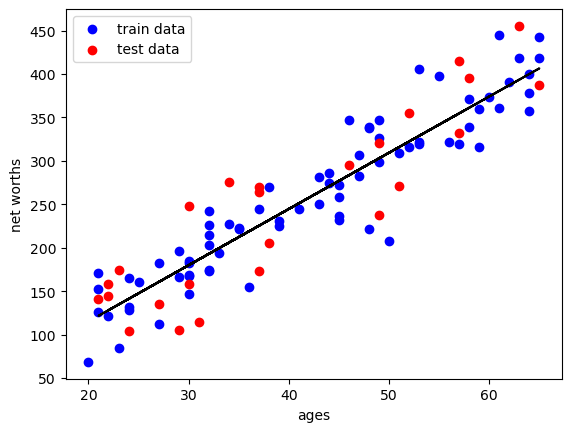

In [34]:
#import numpy
#import matplotlib
#matplotlib.use('agg')

#import matplotlib.pyplot as plt
#from studentRegression import studentReg
#from class_vis import prettyPicture, output_image

#from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

reg = studentReg(ages_train, net_worths_train)


plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")


#plt.savefig("test.png")
#output_image("test.png", "png", open("test.png", "rb").read())

In [35]:
print(f"Katie's net worth prediction: {round(reg.predict([[27]])[0][0], 2):,} USD")
print(f"Slope: {reg.coef_[0][0]}")
print(f"Intercept: {reg.intercept_[0]}")
print("\n########## Stats on Training Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_train, net_worths_train)}")
print("\n########## Stats on Test Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_test, net_worths_test)}")

Katie's net worth prediction: 160.43 USD
Slope: 6.4735495495506425
Intercept: -14.353783306583125

########## Stats on Training Dataset ##########
R-Squared Score: 0.8745882358226371

########## Stats on Test Dataset ##########
R-Squared Score: 0.8123657292322277


## Chapter 8 - Outliers

Sebastian described to us an algorithm for improving a regression, which you will implement in this project. You will work through it in the next few quizzes. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.

Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. A few outliers should clearly pop out. Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know this because we used this value to generate the data); what slope does your regression have?

What is the score you get when using your regression to make predictions with the test data?

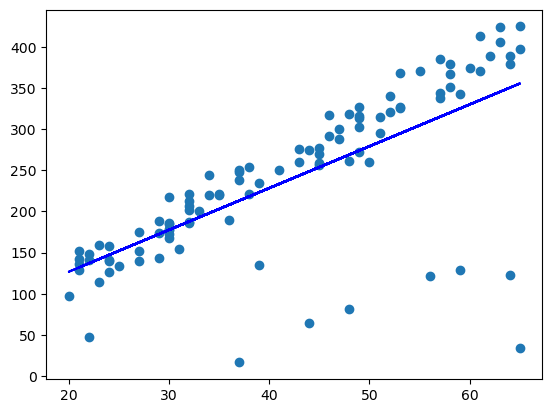

In [36]:

import random
import numpy
import matplotlib.pyplot as plt
import joblib

#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("./ud120-projects/outliers/practice_outliers_ages.pkl", "rb") )
#ages = joblib.load( open("./outliers/practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("./ud120-projects/outliers/practice_outliers_net_worths.pkl", "rb") )
#net_worths = joblib.load( open("./outliers/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [37]:
print(f"Slope: {reg.coef_[0][0]}")
print(f"Intercept: {reg.intercept_[0]}")
print("\n########## Stats on Training Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_train, net_worths_train)}")
print("\n########## Stats on Test Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_test, net_worths_test)}")

Slope: 5.077930643440256
Intercept: 25.21002154563587

########## Stats on Training Dataset ##########
R-Squared Score: 0.4898725961751499

########## Stats on Test Dataset ##########
R-Squared Score: 0.8782624703664672


In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error).

Once this cleaning function is working, you should see the regression result changes. What is the new slope? Is it closer to the “correct” result of 6.25?

What’s the new score when you use the regression to make predictions on the test set?

In [38]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    cnt = len(ages)
    errors = abs(predictions - net_worths)
    bar = sorted(errors)[round(0.9 * cnt)][0]
    
    for i, e in enumerate(errors):
        if e < bar:
            cleaned_data.append((ages[i][0], net_worths[i][0], errors[i][0]))
    
    return cleaned_data

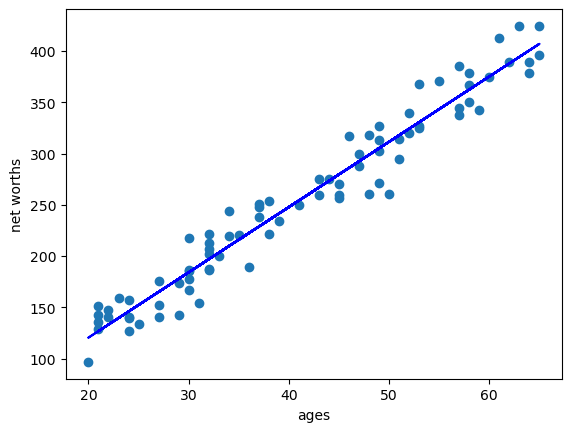

In [39]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")




### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

In [40]:
print(f"Slope: {reg.coef_[0][0]}")
print(f"Intercept: {reg.intercept_[0]}")
print("\n########## Stats on Training Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_train, net_worths_train)}")
print("\n########## Stats on Test Dataset ##########")
print(f"R-Squared Score: {reg.score(ages_test, net_worths_test)}")

Slope: 6.368594806943666
Intercept: -6.918610687302248

########## Stats on Training Dataset ##########
R-Squared Score: 0.4093254544777858

########## Stats on Test Dataset ##########
R-Squared Score: 0.983189455395532


There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in final_project/enron61702insiderpay.pdf
What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

In [41]:
max_bonus = 0.00
max_salary = 0.00
for name, data in enron_data.items():
    if data['salary'] == 'NaN':
        continue
    if data['bonus'] == 'NaN':
        continue
    if data['salary'] > max_salary:
        max_salary = data['salary']
        print(f"{name}'s salary: {max_salary:,} USD")
    if data['bonus'] > max_bonus:
        max_bonus = data['bonus']
        print(f"{name}'s bonus: {max_bonus:,} USD")

METTS MARK's salary: 365,788 USD
METTS MARK's bonus: 600,000 USD
BAXTER JOHN C's bonus: 1,200,000 USD
HANNON KEVIN P's bonus: 1,500,000 USD
MCMAHON JEFFREY's salary: 370,448 USD
MCMAHON JEFFREY's bonus: 2,600,000 USD
HAEDICKE MARK E's salary: 374,125 USD
KITCHEN LOUISE's bonus: 3,100,000 USD
LAVORATO JOHN J's bonus: 8,000,000 USD
SHERRIFF JOHN R's salary: 428,780 USD
WHALLEY LAWRENCE G's salary: 510,364 USD
LAY KENNETH L's salary: 1,072,321 USD
SKILLING JEFFREY K's salary: 1,111,258 USD
TOTAL's salary: 26,704,229 USD
TOTAL's bonus: 97,343,619 USD


## Chapter 8 - Clustering

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

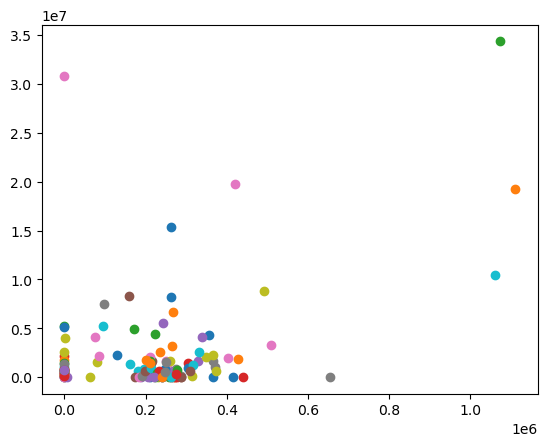

In [42]:
import os
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("./ud120-projects/tools/"))
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name=None, f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    if name is not None:
        plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

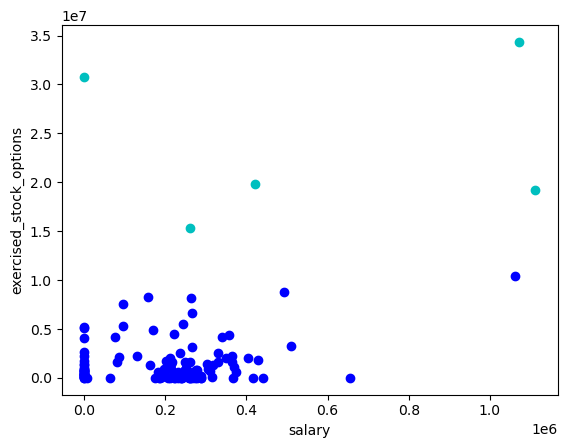

In [43]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2, random_state=42, n_init=50)
clu.fit(finance_features)

pred = clu.predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name=None, f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

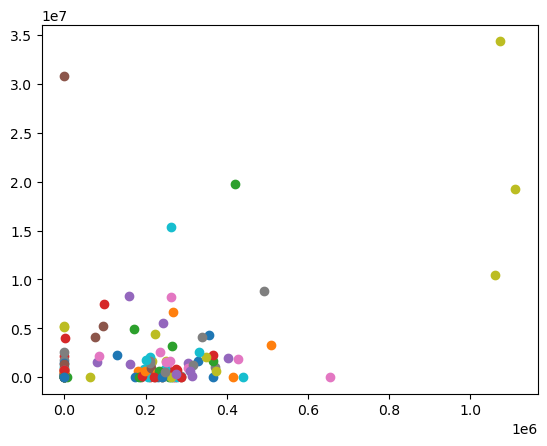

In [44]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "director_fees"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

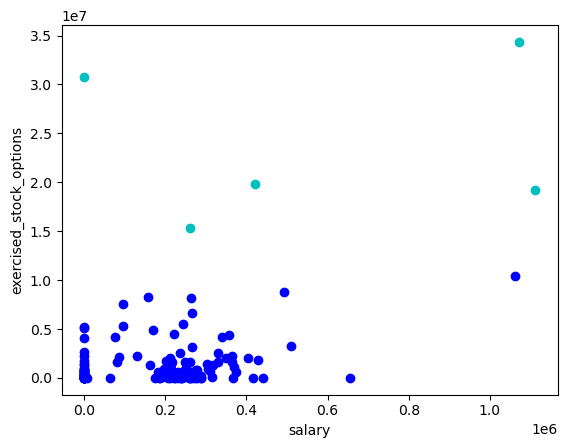

In [45]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2, random_state=42, n_init=50)
clu.fit(finance_features)

pred = clu.predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name=None, f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [46]:
min_eso = 19250000
max_eso = 0.00
for name, data in enron_data.items():
    if name == 'TOTAL':
        continue
    if data['exercised_stock_options'] == 'NaN':
        continue
    if data['exercised_stock_options'] > max_eso:
        max_eso = data['exercised_stock_options']
        print(f"{name}'s exercised stock options: {max_eso:,} USD")
    if data['exercised_stock_options'] < min_eso:
        min_eso = data['exercised_stock_options']
        print(f"{name}'s exercised stock options: {min_eso:,} USD")

BAXTER JOHN C's exercised stock options: 6,680,544 USD
BAXTER JOHN C's exercised stock options: 6,680,544 USD
ELLIOTT STEVEN's exercised stock options: 4,890,344 USD
CORDES WILLIAM R's exercised stock options: 651,850 USD
MEYER ROCKFORD G's exercised stock options: 493,489 USD
LOWRY CHARLES P's exercised stock options: 372,205 USD
JACKSON CHARLENE R's exercised stock options: 185,063 USD
KITCHEN LOUISE's exercised stock options: 81,042 USD
BELFER ROBERT's exercised stock options: 3,285 USD
LAY KENNETH L's exercised stock options: 34,348,384 USD


In [47]:
print(f"Minimum exercised stock options: {min_eso}")
print(f"Maximum exercised stock options: {max_eso}")

Minimum exercised stock options: 3285
Maximum exercised stock options: 34348384


What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [48]:
min_salary = 19250000
max_salary = 0.00
for name, data in enron_data.items():
    if name == 'TOTAL':
        continue
    if data['salary'] == 'NaN':
        continue
    if data['salary'] > max_salary:
        max_salary = data['salary']
        print(f"{name}'s salary: {max_salary:,} USD")
    if data['salary'] < min_salary:
        min_salary = data['salary']
        print(f"{name}'s salary: {min_salary:,} USD")

METTS MARK's salary: 365,788 USD
METTS MARK's salary: 365,788 USD
BAXTER JOHN C's salary: 267,102 USD
ELLIOTT STEVEN's salary: 170,941 USD
MCMAHON JEFFREY's salary: 370,448 USD
HAEDICKE MARK E's salary: 374,125 USD
HUMPHREY GENE E's salary: 130,724 USD
WESTFAHL RICHARD K's salary: 63,744 USD
BANNANTINE JAMES M's salary: 477 USD
SHERRIFF JOHN R's salary: 428,780 USD
WHALLEY LAWRENCE G's salary: 510,364 USD
LAY KENNETH L's salary: 1,072,321 USD
SKILLING JEFFREY K's salary: 1,111,258 USD


In [49]:
print(f"Minimum salary: {min_salary}")
print(f"Maximum salary: {max_salary}")

Minimum salary: 477
Maximum salary: 1111258


## Chapter 9 - Feature Scaling

In [71]:
### FYI, the most straightforward implementation might 
### throw a divide-by-zero error, if the min and max
### values are the same
### but think about this for a second--that means that every
### data point has the same value for that feature!  
### why would you rescale it?  Or even use it at all?
def featureScaling(arr):

    x_min = min(arr)
    x_max = max(arr)
    denom = float(x_max - x_min)
    scale = lambda x: round((x - x_min) / denom, 3)
    return(list(map(scale, arr)))

def apply_feature_scaling(x, data):
    
    arr = list(data)
    arr.append(x)
    arr = featureScaling(arr)
    x = arr.pop()
    return(x)

In [72]:
# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print(featureScaling(data))

[0.0, 0.417, 1.0]


In [73]:
ex_data = [115, 140, 175]
x_scaled = apply_feature_scaling(140, ex_data)
print(f"The minimum value is: {min(ex_data)}")
print(f"The maximum value is: {max(ex_data)}")
print(f"The scaled value of 140 is: {x_scaled}")

The minimum value is: 115
The maximum value is: 175
The scaled value of 140 is: 0.417


In [83]:
from sklearn.preprocessing import MinMaxScaler
import numpy
weights = numpy.array([[x] for x in ex_data], dtype='f')
scaler = MinMaxScaler()
rescaled_weights = scaler.fit_transform(weights)
rescaled_weights

array([[0.        ],
       [0.41666675],
       [1.        ]], dtype=float32)

Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). What would be the rescaled value of a "salary" feature that had an original value of $200,000, and an "exercised_stock_options" feature of $1 million? (Be sure to represent these numbers as floats, not integers!)

In [98]:
salary_scaler = MinMaxScaler()
salaries = numpy.array([[x[0]] for x in finance_features], dtype='f')
salary_scaler.fit(salaries)
salary = numpy.array([[200000.0]])
rescaled_salary = salary_scaler.transform(salary)
print(f"The rescaled value of a salary feature that had an original value of 200,000 USD is: {round(rescaled_salary[0][0], 3)}")

0.17997621171161882
The rescaled value of a salary feature that had an original value of 200,000 USD is: 0.18


In [99]:
eso_scaler = MinMaxScaler()
esos = numpy.array([[x[1]] for x in finance_features], dtype='f')
eso_scaler.fit(esos)
eso = numpy.array([[1000000.0]])
rescaled_eso = eso_scaler.transform(eso)
print(f"The rescaled value of a exercised stock options feature that had an original value of 1,000,000 USD is: {round(rescaled_eso[0][0], 3)}")

The rescaled value of a exercised stock options feature that had an original value of 1,000,000 USD is: 0.029
